# Comparing model predictions

The purpose of this notebook is to see how the models are differing in their predictions.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Final Data/start_to_finish_with_preds.csv')

In [4]:
df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,team_WHIP_pct_diff,xgb_pred,knn_pred,knn_no_batting_pred,nn_pred,xgb_proba,knn_proba,knn_no_batting_proba,nn_proba,home_win
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,-0.012113,0.0,0.0,0.0,1,0.452681,0.500000,0.500000,0.615994,1.0
1,2016,4,TBA,TOR,1508.5856,1543.1775,0.246346,0.260793,0.309376,0.332750,...,0.014688,0.0,0.0,0.0,0,0.377228,0.493333,0.500000,0.446586,0.0
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,0.080079,1.0,0.0,0.0,1,0.629717,0.500000,0.500000,0.588885,1.0
3,2016,4,OAK,CHA,1488.3344,1489.9082,0.246621,0.244771,0.308523,0.302390,...,-0.016226,1.0,1.0,1.0,1,0.572504,0.533333,0.540000,0.503614,0.0
4,2016,4,ANA,CHN,1509.8676,1526.6748,0.240166,0.239208,0.301890,0.316835,...,0.089003,1.0,1.0,1.0,1,0.515874,0.506667,0.513333,0.609053,0.0


## Column distribution by model

In [5]:
df['xgb_correct'] = df['home_win'] == df['xgb_pred']
df['knn_correct'] = df['home_win'] == df['knn_pred']
df['knn_no_batting_correct'] = df['home_win'] == df['knn_no_batting_pred']
df['nn_correct'] = df['home_win'] == df['nn_pred']

In [6]:
def adjust_proba(x):
    if x > 0.5:
        return 2*(x - 0.5)
    else:
        return 2*(1 - x - 0.5)

In [7]:
df['xgb_proba_majority'] = df['xgb_proba'].apply(adjust_proba)
df['knn_proba_majority'] = df['knn_proba'].apply(adjust_proba)
df['knn_no_batting_proba_majority'] = df['knn_no_batting_proba'].apply(adjust_proba)
df['nn_proba_majority'] = df['nn_proba'].apply(adjust_proba)

In [8]:
df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,nn_proba,home_win,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,0.615994,1.0,False,False,False,True,0.094638,0.000000,0.000000,0.231988
1,2016,4,TBA,TOR,1508.5856,1543.1775,0.246346,0.260793,0.309376,0.332750,...,0.446586,0.0,True,True,True,True,0.245543,0.013333,0.000000,0.106828
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,0.588885,1.0,True,False,False,True,0.259434,0.000000,0.000000,0.177770
3,2016,4,OAK,CHA,1488.3344,1489.9082,0.246621,0.244771,0.308523,0.302390,...,0.503614,0.0,False,False,False,False,0.145007,0.066667,0.080000,0.007228
4,2016,4,ANA,CHN,1509.8676,1526.6748,0.240166,0.239208,0.301890,0.316835,...,0.609053,0.0,False,False,False,False,0.031748,0.013333,0.026667,0.218106


In [9]:
xgb_correct = df[df['xgb_pred'] == df['home_win']]
xgb_wrong = df[df['xgb_pred'] != df['home_win']]

knn_correct = df[df['knn_pred'] == df['home_win']]
knn_wrong = df[df['knn_pred'] != df['home_win']]

knn_no_batting_correct = df[df['knn_no_batting_pred'] == df['home_win']]
knn_no_batting_wrong = df[df['knn_no_batting_pred'] != df['home_win']]

nn_correct = df[df['nn_pred'] == df['home_win']]
nn_wrong = df[df['nn_pred'] != df['home_win']]

In [10]:
cols = list(df.columns)
cols = [c for c in cols if c.endswith('_diff')] + ['log_5']

In [11]:
def plot_density_by_model(model_correct, model_wrong):
    for c in cols:
        plt.figure(figsize=(12, 8))
        plt.hist(model_correct[c], label='Correct', alpha=0.5, density=True)
        plt.hist(model_wrong[c], label='Wrong', alpha=0.5, density=True)
        plt.legend()
        plt.title(c)
        plt.show();

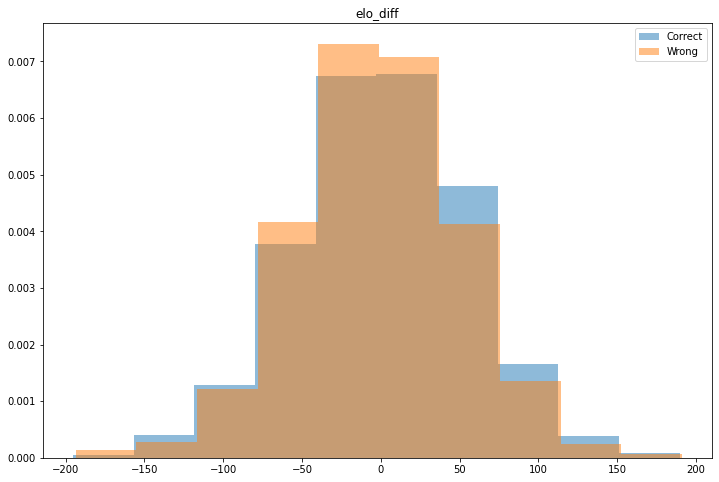

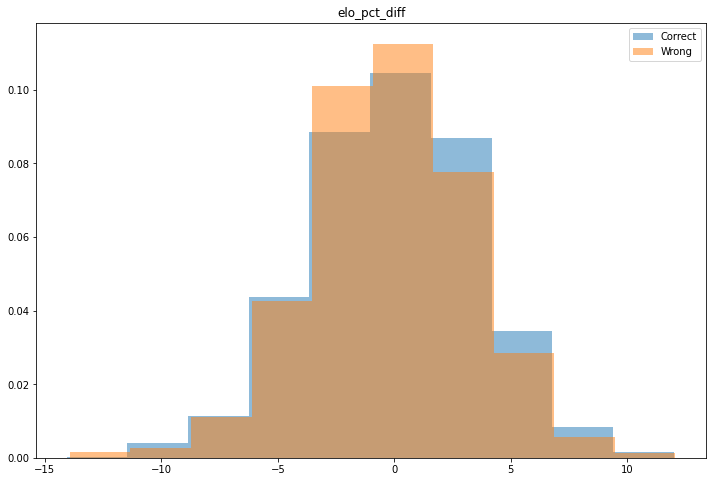

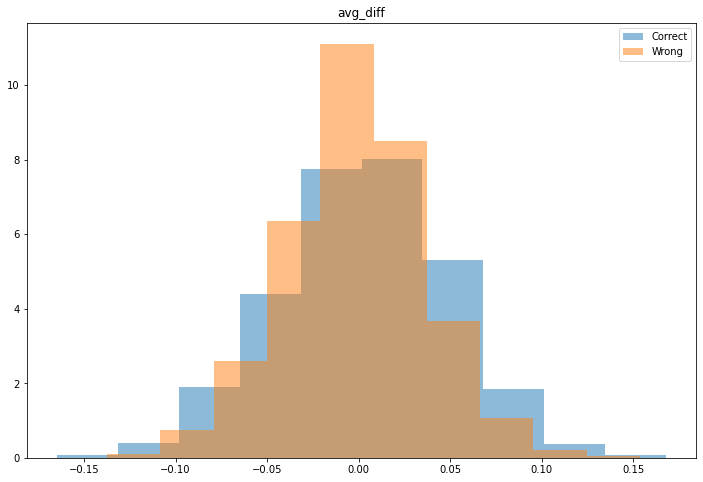

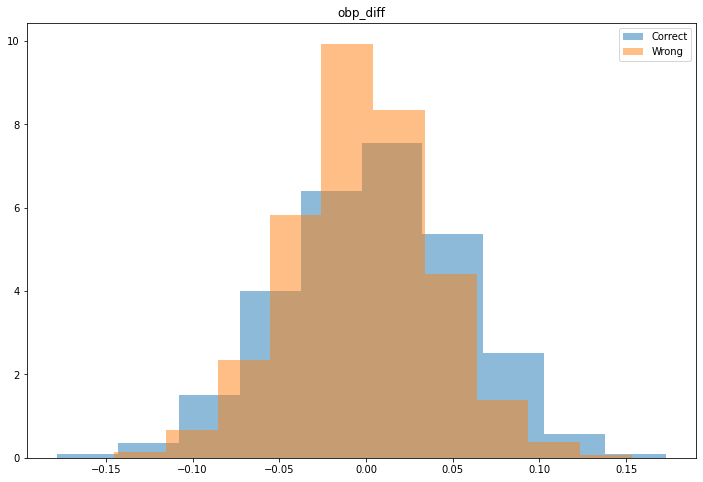

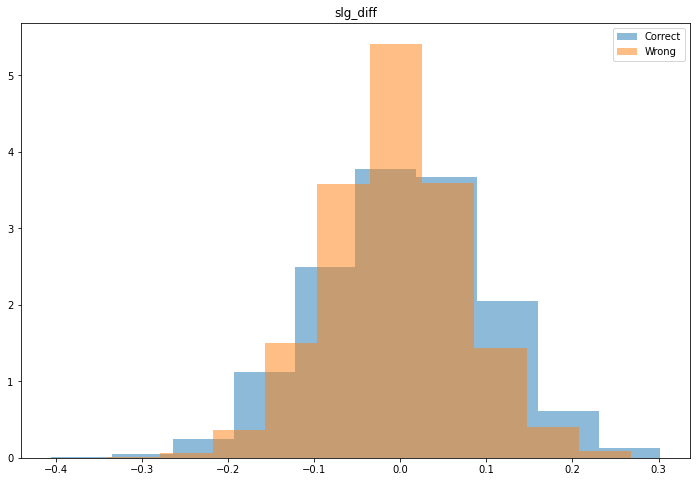

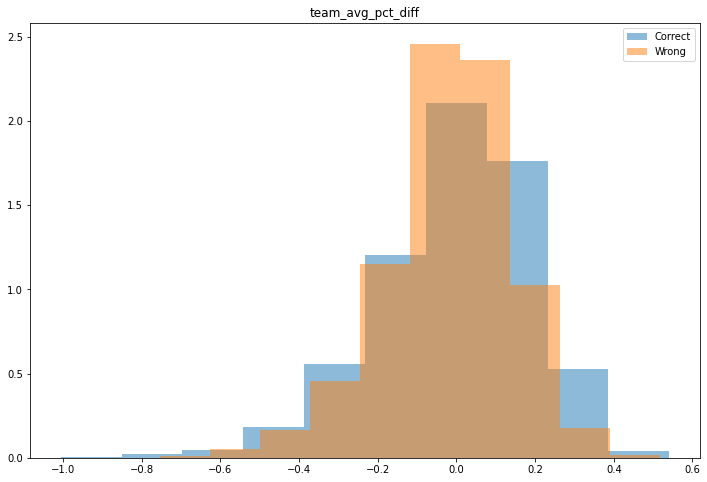

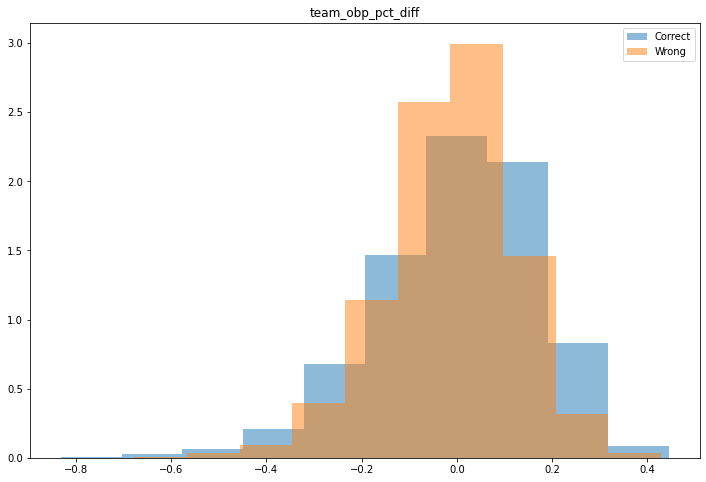

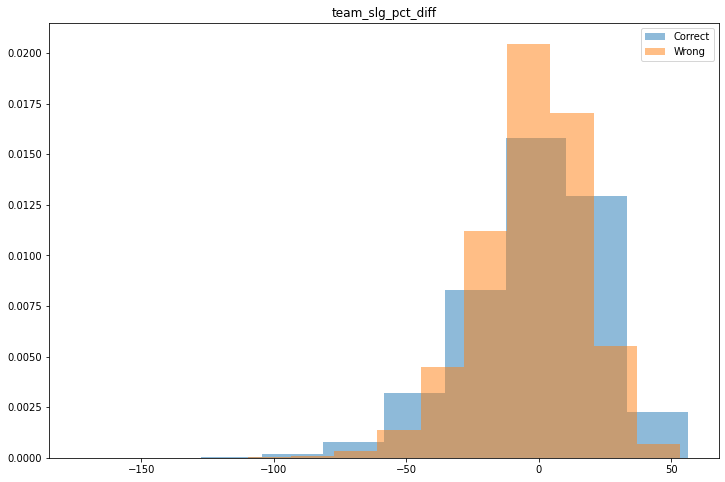

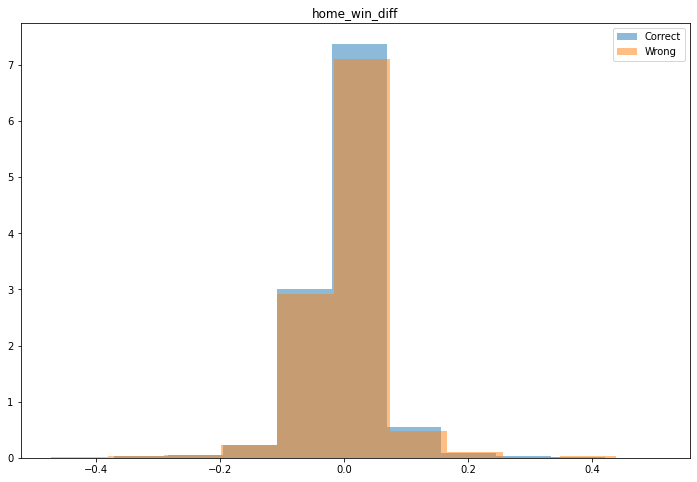

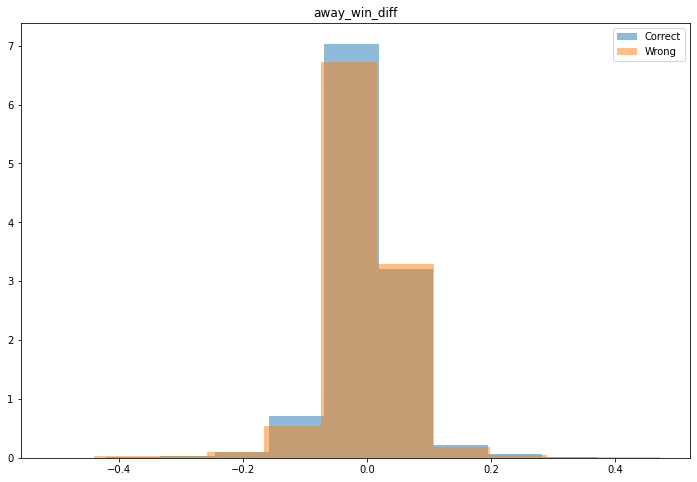

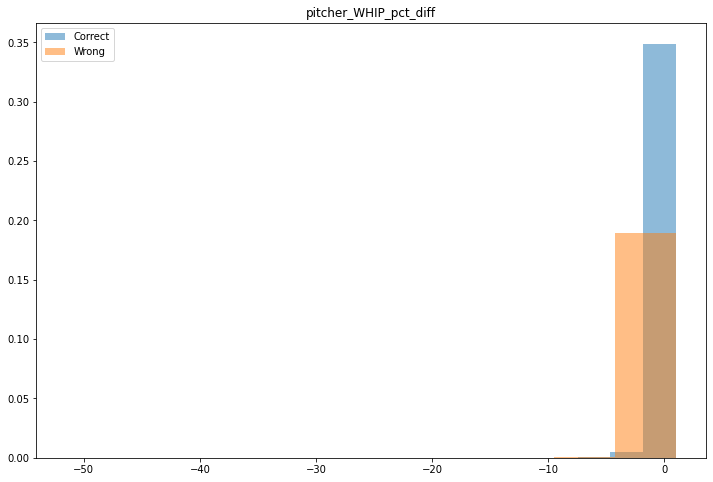

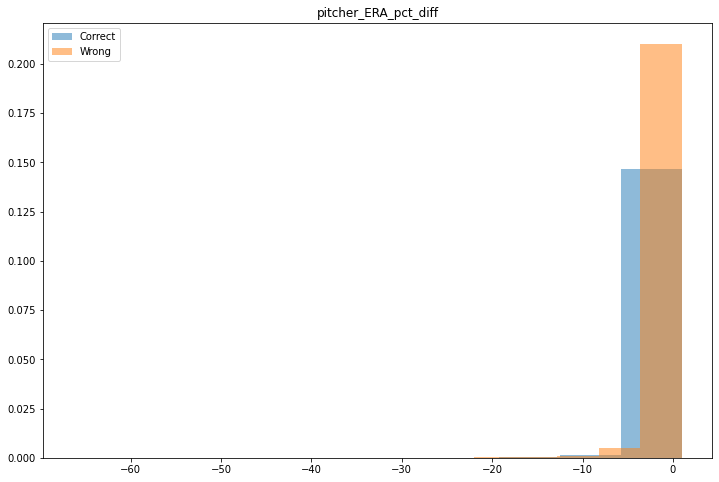

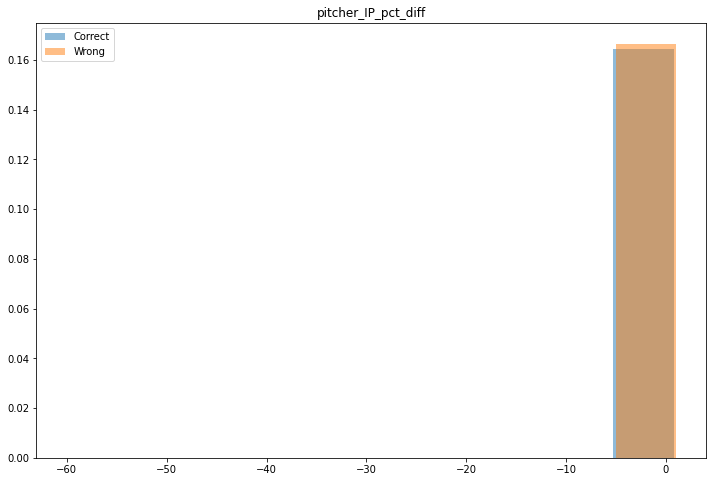

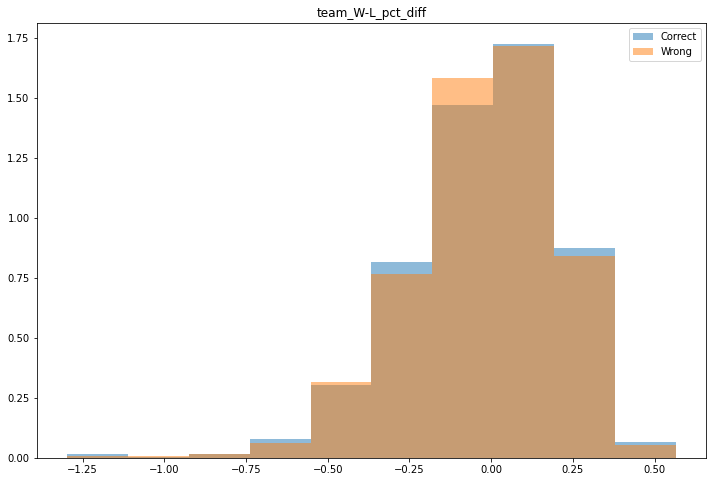

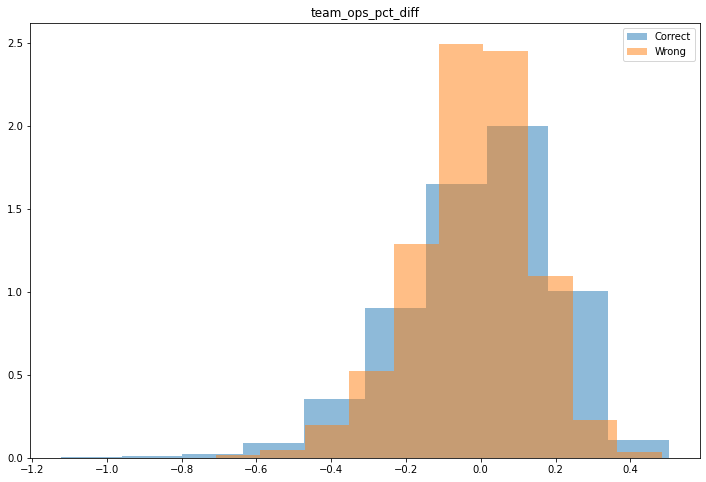

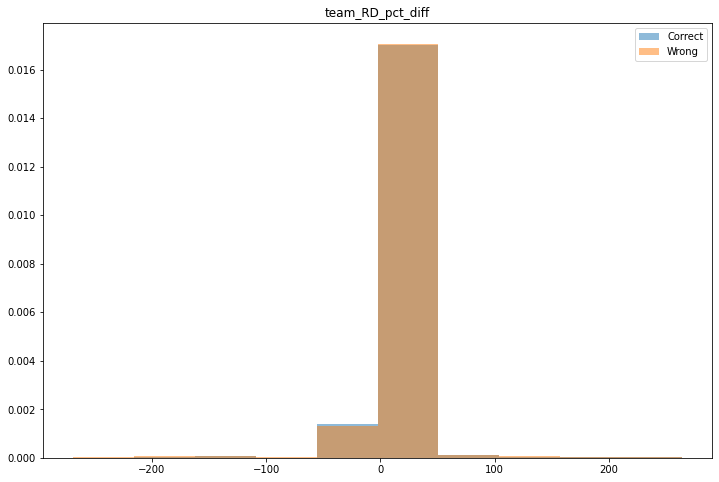

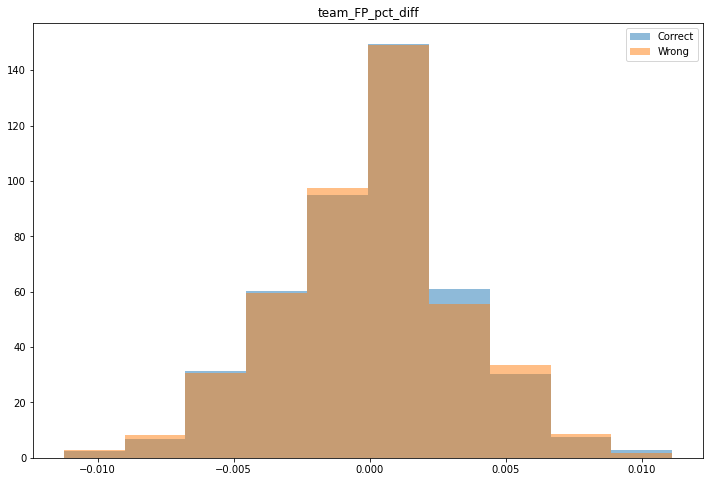

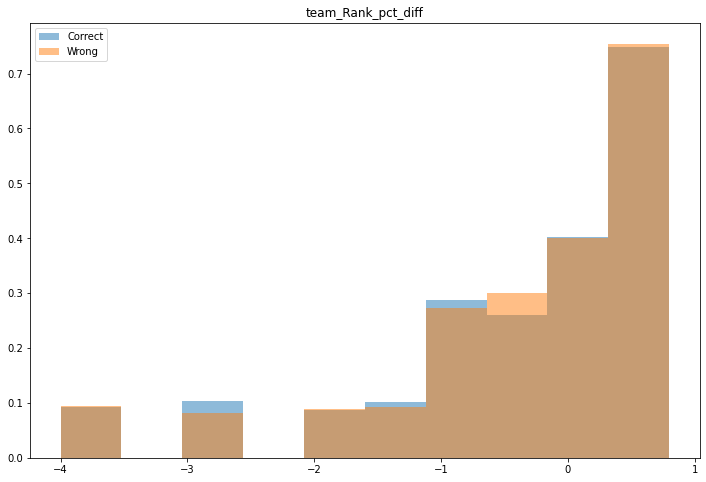

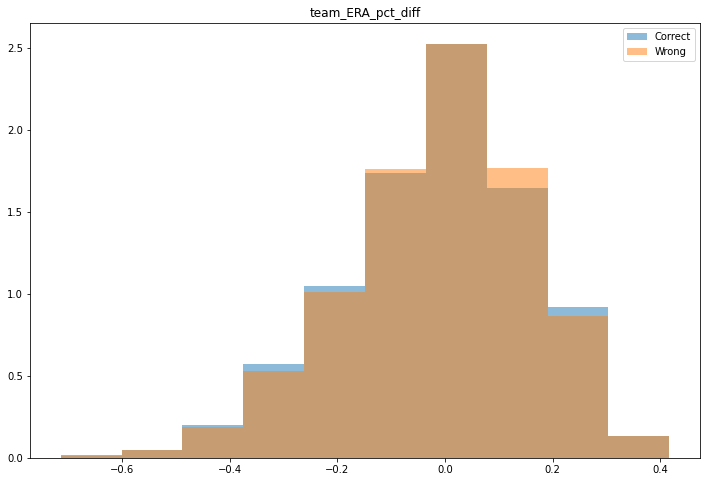

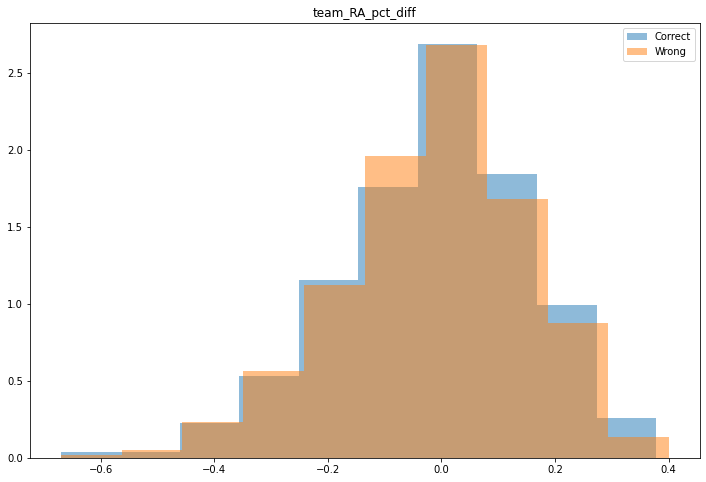

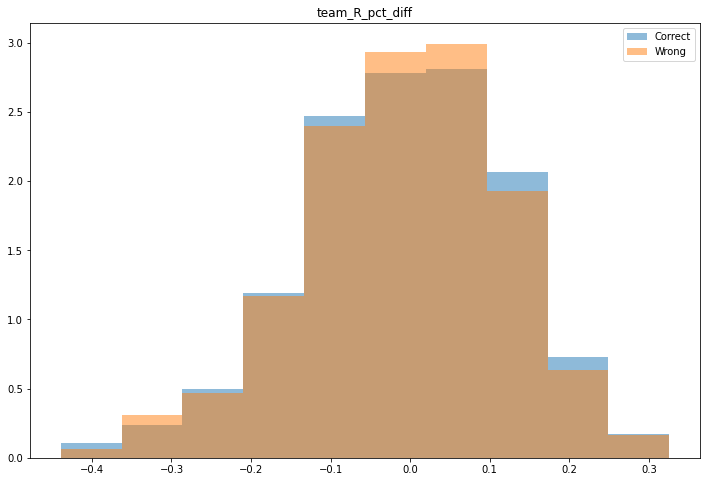

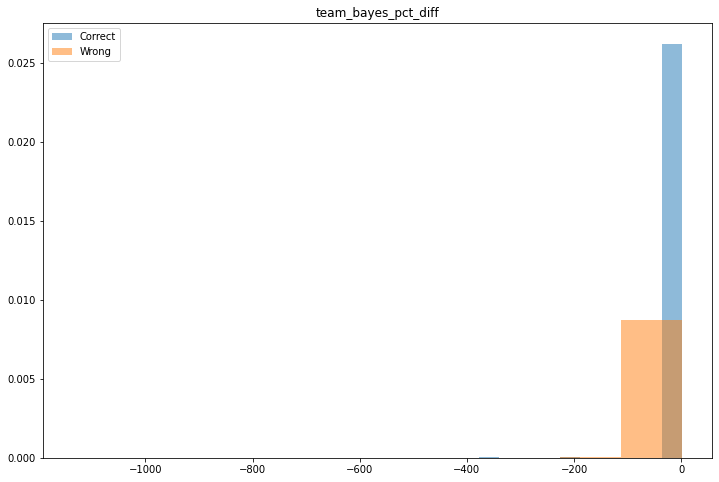

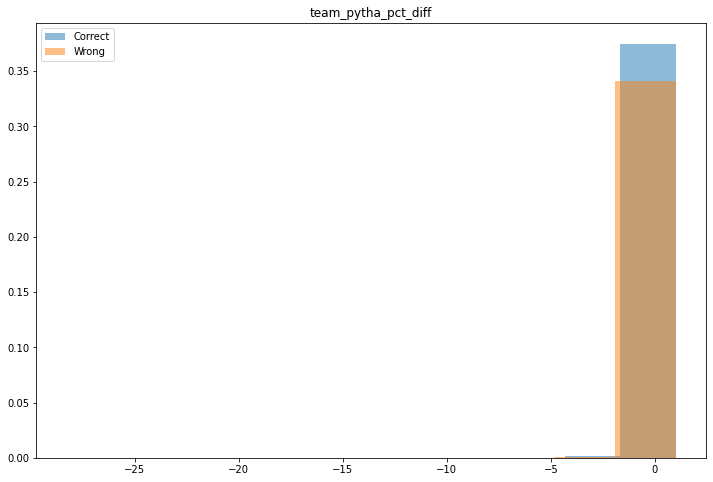

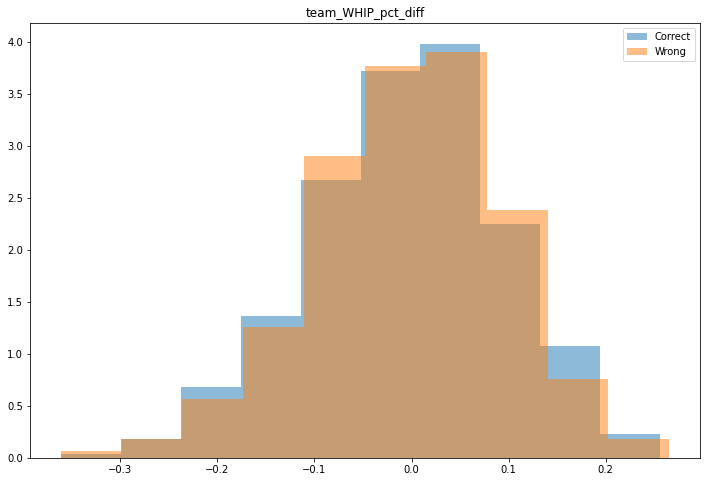

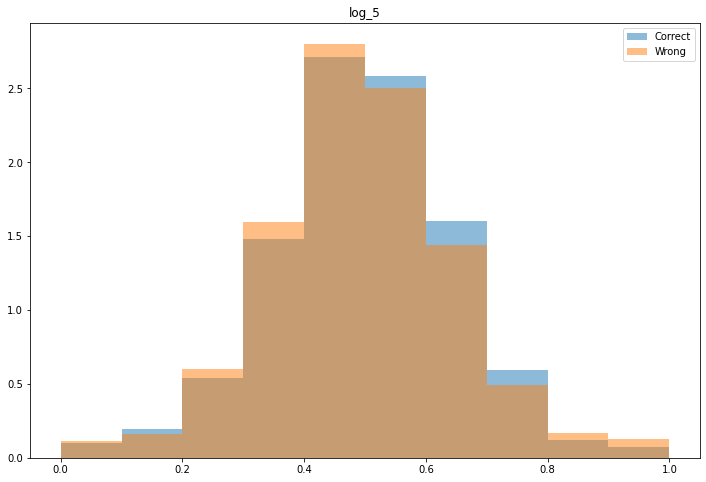

In [12]:
plot_density_by_model(xgb_correct, xgb_wrong)

In [13]:
def plot_density_across_models(col):
    models_correct = [xgb_correct, knn_correct, nn_correct]
    models_wrong = [xgb_wrong, knn_wrong, nn_wrong]
    models_labels = ['XGB', 'KNN', 'NN']
        
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_correct):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} correct')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_wrong):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} wrong')
    plt.show();

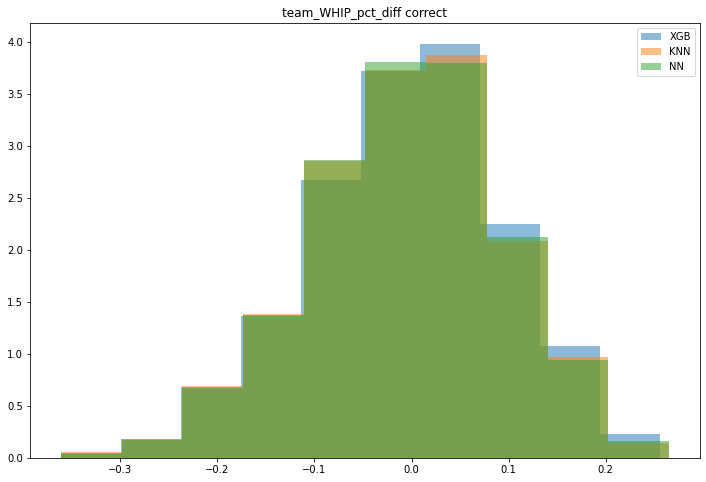

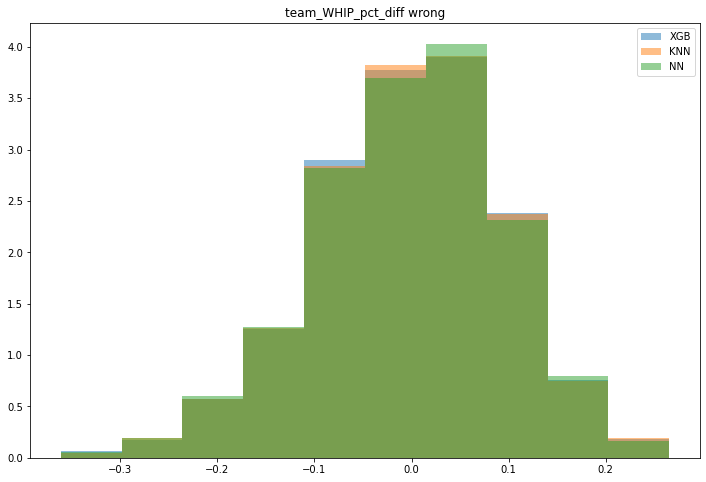

In [14]:
plot_density_across_models('team_WHIP_pct_diff')

## Accuracy by team

In [15]:
df['xgb_correct'] = (df['home_win'] == df['xgb_pred']).astype(bool)
df['knn_correct'] = (df['home_win'] == df['knn_pred']).astype(bool)
df['nn_correct'] = (df['home_win'] == df['nn_pred']).astype(bool)

In [16]:
df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,nn_proba,home_win,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,0.615994,1.0,False,False,False,True,0.094638,0.000000,0.000000,0.231988
1,2016,4,TBA,TOR,1508.5856,1543.1775,0.246346,0.260793,0.309376,0.332750,...,0.446586,0.0,True,True,True,True,0.245543,0.013333,0.000000,0.106828
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,0.588885,1.0,True,False,False,True,0.259434,0.000000,0.000000,0.177770
3,2016,4,OAK,CHA,1488.3344,1489.9082,0.246621,0.244771,0.308523,0.302390,...,0.503614,0.0,False,False,False,False,0.145007,0.066667,0.080000,0.007228
4,2016,4,ANA,CHN,1509.8676,1526.6748,0.240166,0.239208,0.301890,0.316835,...,0.609053,0.0,False,False,False,False,0.031748,0.013333,0.026667,0.218106


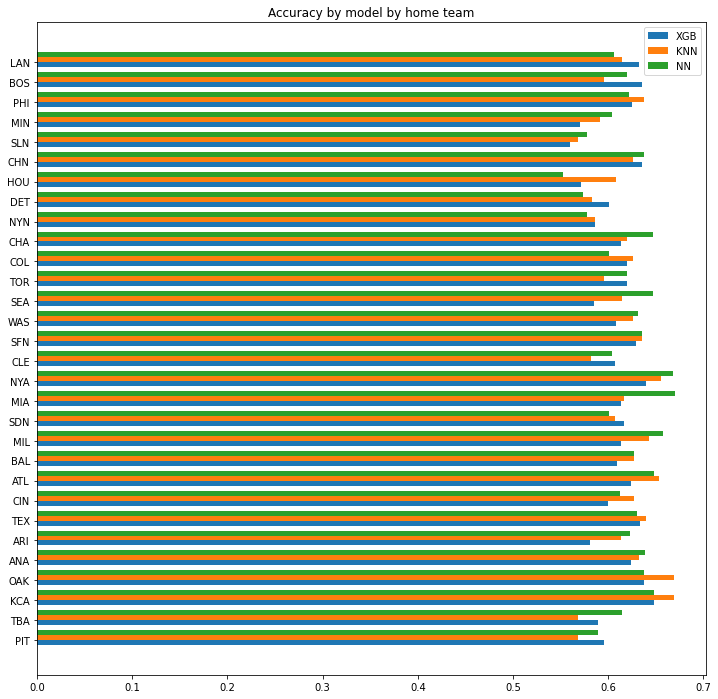

In [17]:
N = df['home_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('home_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('home_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('home_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['home_team'].unique())
plt.legend()
plt.title('Accuracy by model by home team');

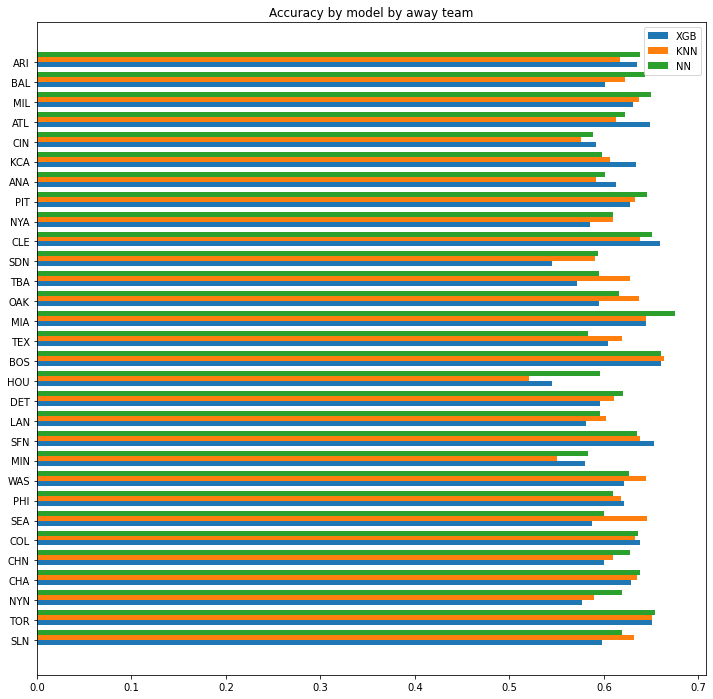

In [18]:
N = df['away_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('away_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('away_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('away_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['away_team'].unique())
plt.legend()
plt.title('Accuracy by model by away team');

## Heatmap of model accuracy by year by team

In [19]:
model_acc = df.groupby(['Y', 'home_team'])[['xgb_correct', 'knn_correct', 'nn_correct']].mean()

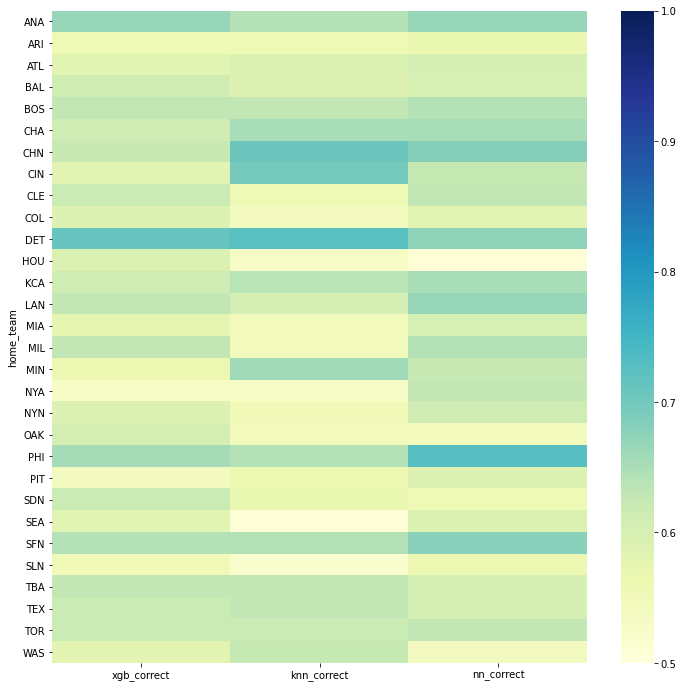

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2016], vmin=0.5, vmax=1, cmap="YlGnBu");

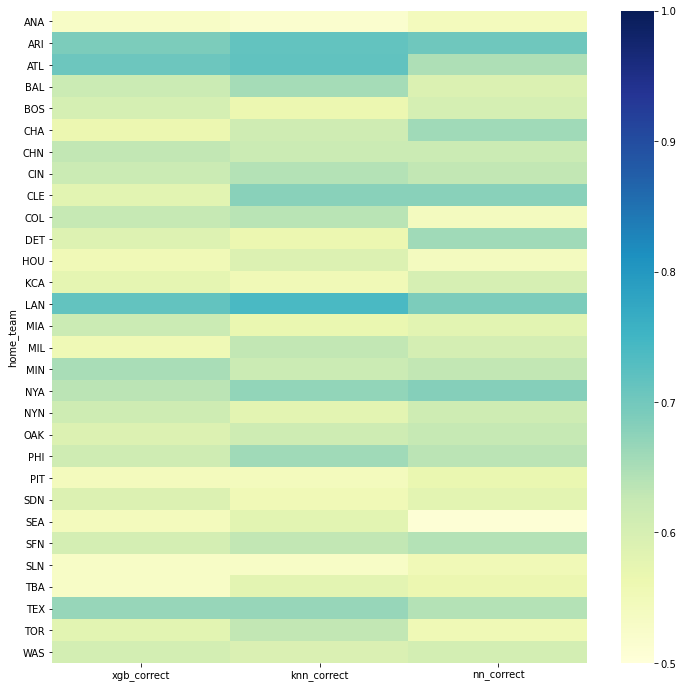

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2017], vmin=0.5, vmax=1, cmap="YlGnBu");

## Predicted probabilities

Do the models predicted probabilities serve as a useful proxy for confidence in their prediction?

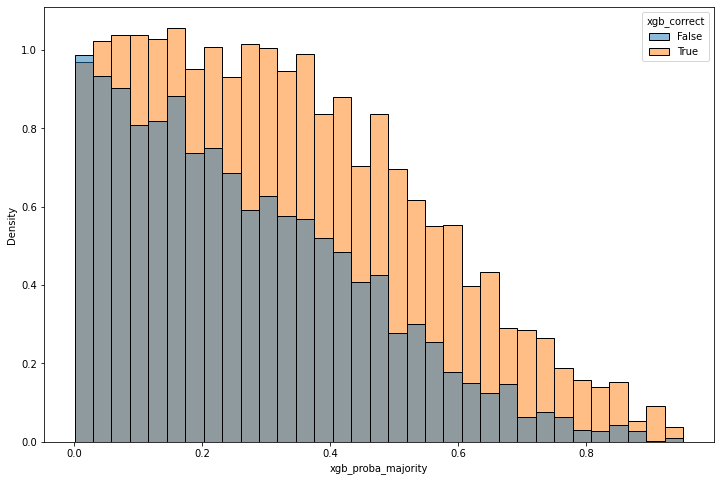

In [22]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='xgb_proba_majority', hue='xgb_correct', stat='density');

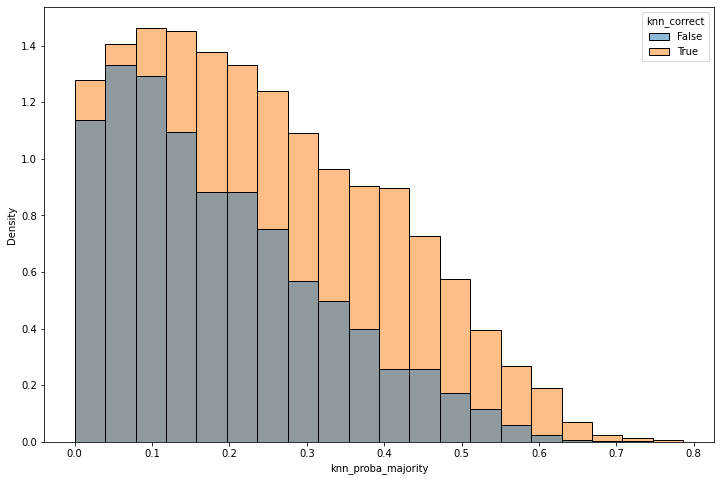

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_proba_majority', hue='knn_correct', stat='density', bins=20);

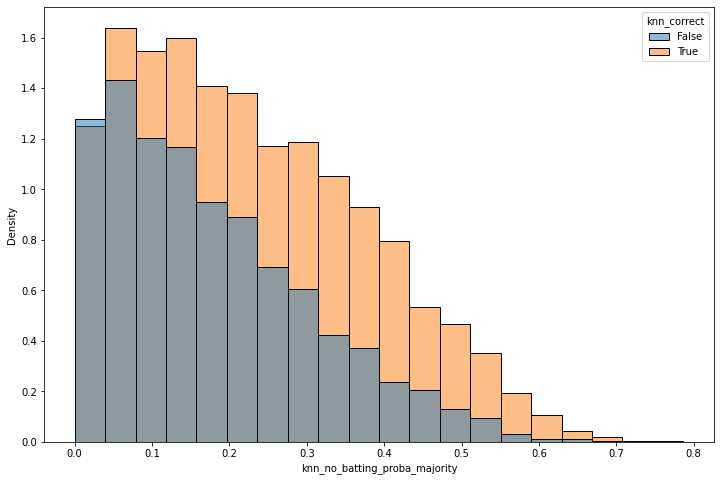

In [24]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_no_batting_proba_majority', hue='knn_correct', stat='density', bins=20);

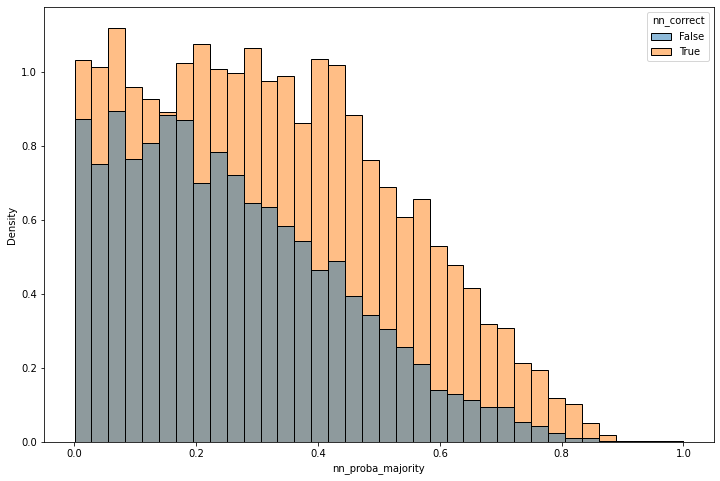

In [25]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='nn_proba_majority', hue='nn_correct', stat='density');

## Agreements and disagreements

Use Morgan's idea of where KNN (no hitting) and the NN disagree and remake the above graphs.

In [131]:
conditions = [(df['knn_no_batting_pred'] != df['nn_pred'])]     #Sets the conditions
choices = [1]
df['mixed_nn_knn'] = np.select(conditions, choices, 0)

conditions = [(df['knn_no_batting_pred'] == df['nn_pred'])]     #Sets the conditions
choices = [1]
df['agree_nn_knn'] = np.select(conditions, choices, 0)

disagree_df = df[df['mixed_nn_knn'] == 1]
agree_df = df[df['agree_nn_knn'] == 1]

In [133]:
disagree_df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority,mixed_nn_knn,agree_nn_knn
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,False,False,False,True,0.094638,0.000000,0.000000,0.231988,1,0
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,True,False,False,True,0.259434,0.000000,0.000000,0.177770,1,0
5,2016,4,ARI,COL,1496.8322,1477.1567,0.256661,0.259474,0.317551,0.309843,...,False,False,False,True,0.137382,0.093333,0.093333,0.069340,1,0
6,2016,4,TBA,TOR,1506.8030,1544.9601,0.246346,0.260793,0.309376,0.332750,...,True,False,False,True,0.039595,0.040000,0.013333,0.008655,1,0
8,2016,4,CIN,PHI,1469.5746,1468.9253,0.241693,0.242109,0.306462,0.296102,...,True,True,True,False,0.166141,0.066667,0.053333,0.193895,1,0


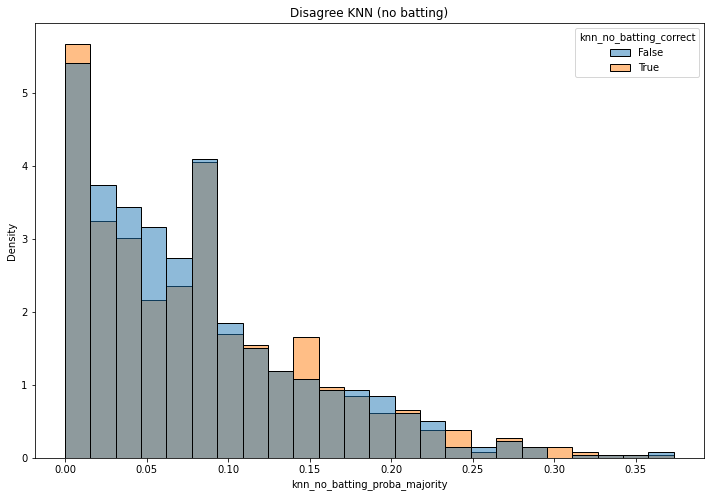

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_df, x='knn_no_batting_proba_majority', hue='knn_no_batting_correct', stat='density')
plt.title('Disagree KNN (no batting)');

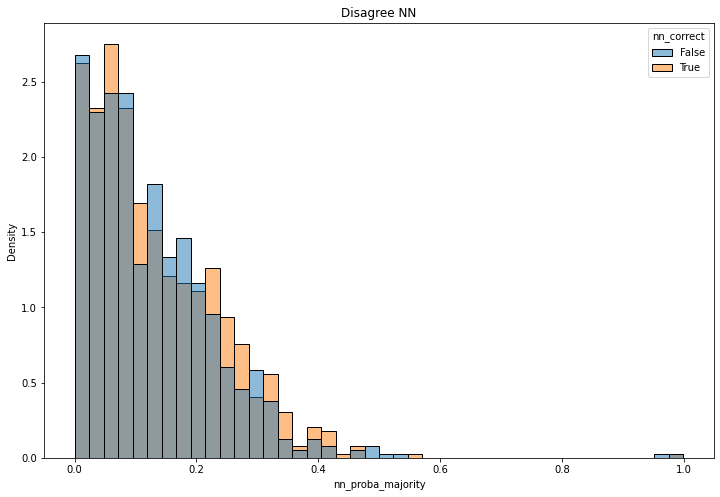

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_df, x='nn_proba_majority', hue='nn_correct', stat='density')
plt.title('Disagree NN');

A quick attempt at splitting out the main hitting and pitching columns. If this approach shows promise, ask Morgan to do this more carefully.

In [30]:
hitting_cols = ['team_avg_pct_diff', 'team_obp_pct_diff', 'team_slg_pct_diff', 'team_ops_pct_diff']
pitching_cols = [c for c in disagree_df.columns if '_pitcher_' in c]
pitching_cols += [c for c in disagree_df.columns if '_WHIP_' in c]
pitching_cols += [c for c in disagree_df.columns if '_ERA_' in c]
pitching_cols = [c for c in pitching_cols if c.endswith('_pct_diff')]
pitching_cols = list(set(pitching_cols))

In [31]:
hitting_cols

['team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'team_ops_pct_diff']

In [32]:
pitching_cols

['pitcher_WHIP_pct_diff',
 'pitcher_ERA_pct_diff',
 'team_WHIP_pct_diff',
 'team_ERA_pct_diff']

When the two models disagree, how many of the hitting columns are positive (when the home team wins, or negative when the away team wins)? What about the same for pitching columns? Compare the percentages over all games (regardless of if the models agreed or not) versus just games where the models disagreed.

In [33]:
all_games_hitting = (df[(df['home_win'] == 1)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
all_games_hitting.name = 'all_games_hitting'

In [34]:
disagree_games_hitting = (disagree_df[(disagree_df['home_win'] == 1)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting.name = 'disagree_games_hitting'

In [35]:
disagree_games_hitting_knn_correct = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'] == True)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting_knn_correct.name = 'disagree_games_hitting_knn_correct'

In [36]:
disagree_games_hitting_nn_correct = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'] == True)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting_nn_correct.name = 'disagree_games_hitting_nn_correct'

In [37]:
stats_df = pd.merge(all_games_hitting, disagree_games_hitting, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_hitting_knn_correct, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_hitting_nn_correct, left_index=True, right_index=True)

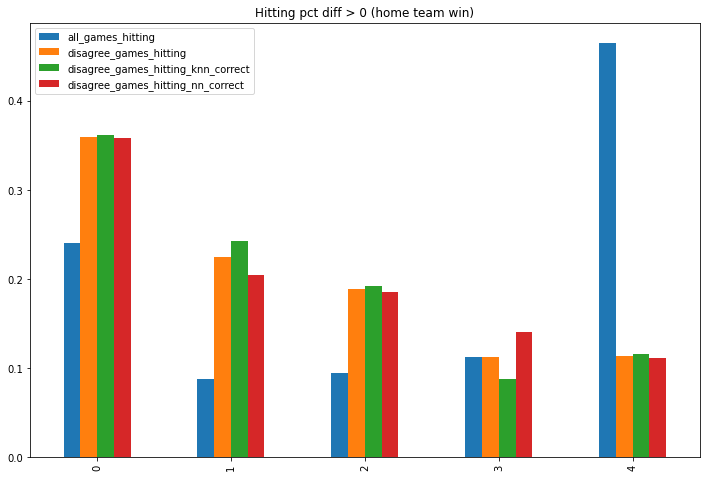

In [38]:
stats_df.plot(kind='bar', figsize=(12, 8), title='Hitting pct diff > 0 (home team win)');

Repeat it for the pitching columns.

In [39]:
all_games_pitching = (df[(df['home_win'] == 1)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
all_games_pitching.name = 'all_games_pitching'

In [40]:
disagree_games_pitching = (disagree_df[(disagree_df['home_win'] == 1)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching.name = 'disagree_games_pitching'

In [41]:
disagree_games_pitching_knn_correct = (disagree_df[(disagree_df['home_win'] == 0) & (disagree_df['knn_no_batting_correct'] == True)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching_knn_correct.name = 'disagree_games_pitching_knn_correct'

In [42]:
disagree_games_pitching_nn_correct = (disagree_df[(disagree_df['home_win'] == 0) & (disagree_df['nn_correct'] == True)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching_nn_correct.name = 'disagree_games_pitching_nn_correct'

In [43]:
stats_df = pd.merge(all_games_pitching, disagree_games_pitching, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_pitching_knn_correct, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_pitching_nn_correct, left_index=True, right_index=True)

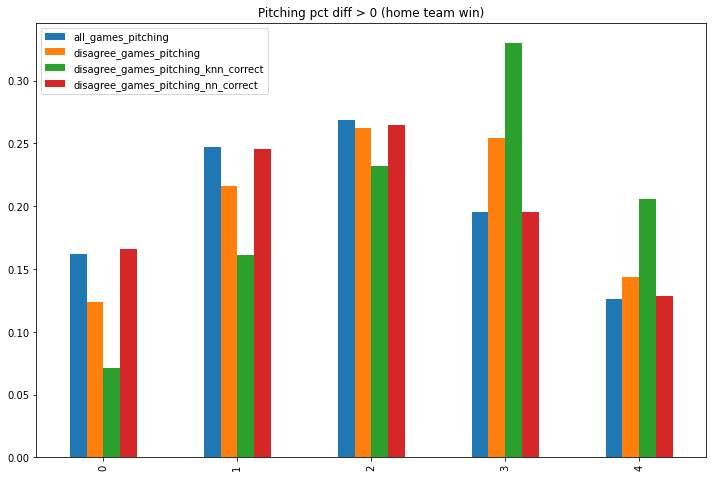

In [44]:
stats_df.plot(kind='bar', figsize=(12, 8), title='Pitching pct diff > 0 (home team win)');

In [124]:
def compare_col_signs(col, positive_favors_home=True):
    if not isinstance(col, list):
        col = [col]
    if positive_favors_home:
        all_games = (df[(df['home_win'] == 1)][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        all_games.name = 'all_games'
        disagree_games = (disagree_df[(disagree_df['home_win'] == 1)][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games.name = 'disagree_games'
        disagree_games_knn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'])][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_knn.name = 'disagree_games_knn_correct'
        disagree_games_nn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'])][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_nn.name = 'disagree_games_nn_correct'
        stats_df = pd.merge(all_games, disagree_games, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_knn, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_nn, left_index=True, right_index=True)
        
        amount = 0
        for i in range(stats_df.shape[0]):
            nn_val = stats_df.iloc[i]['disagree_games_nn_correct']
            knn_val = stats_df.iloc[i]['disagree_games_knn_correct']
            if nn_val > knn_val:
                amount = amount + (nn_val-knn_val)
            else:
                amount = amount + (knn_val-nn_val)
        print(f'The value is {amount}')
        
        stats_df.plot(kind='bar', figsize=(12, 8))
    else:
        all_games = (df[(df['home_win'] == 1)][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        all_games.name = 'all_games'
        disagree_games = (disagree_df[(disagree_df['home_win'] == 1)][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games.name = 'disagree_games'
        disagree_games_knn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'])][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_knn.name = 'disagree_games_knn_correct'
        disagree_games_nn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'])][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_nn.name = 'disagree_games_nn_correct'
        stats_df = pd.merge(all_games, disagree_games, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_knn, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_nn, left_index=True, right_index=True)
                
        stats_df.plot(kind='bar', figsize=(12, 8))
        amount=0
    return amount

In [46]:
pct_diff_cols = [c for c in disagree_df.columns if c.endswith('_pct_diff')]
pct_diff_reverse_cols = ['pitcher_WHIP_pct_diff', 'team_Rank_pct_diff', 
                         'team_WHIP_pct_diff', 'team_ERA_pct_diff', 'pitcher_ERA_pct_diff',
                         'team_RA_pct_diff']
for c in pct_diff_reverse_cols:
    pct_diff_cols.remove(c)

In [47]:
pct_diff_cols

['elo_pct_diff',
 'team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_ops_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

In [48]:
pct_diff_reverse_cols

['pitcher_WHIP_pct_diff',
 'team_Rank_pct_diff',
 'team_WHIP_pct_diff',
 'team_ERA_pct_diff',
 'pitcher_ERA_pct_diff',
 'team_RA_pct_diff']

In [49]:
hitting_cols = ['team_avg_pct_diff', 'team_obp_pct_diff', 
                'team_slg_pct_diff', 'team_ops_pct_diff']

The value is 0.023184988702230125


0.023184988702230125

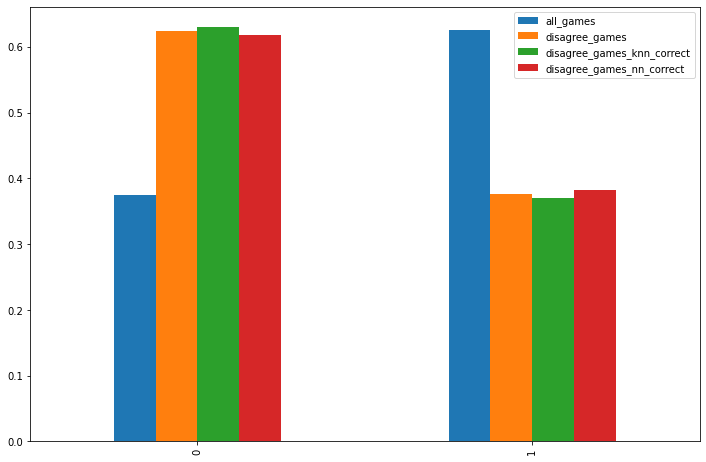

In [106]:
compare_col_signs('team_obp_pct_diff')

The value is 0.1052411828273897


0.1052411828273897

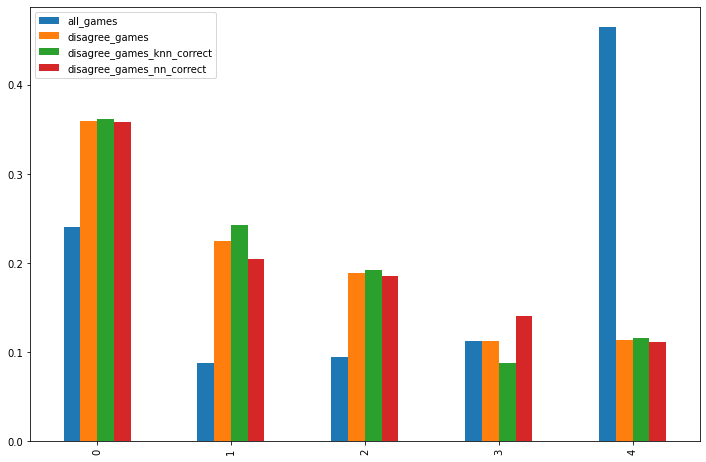

In [107]:
compare_col_signs(hitting_cols)

The value is 0.622255378720896


0.622255378720896

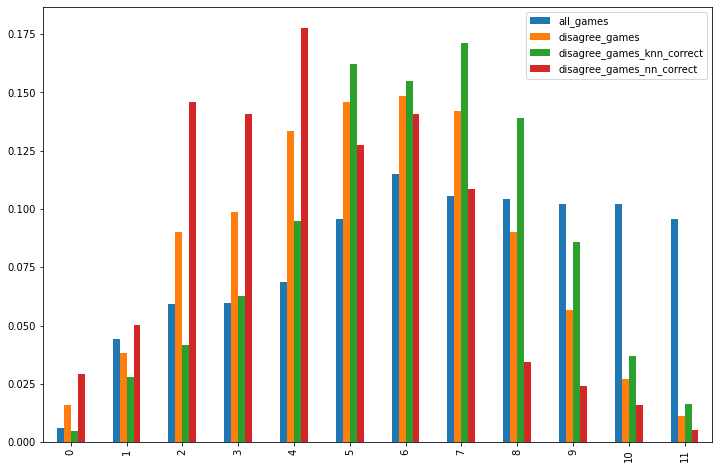

In [108]:
compare_col_signs(pct_diff_cols)

0

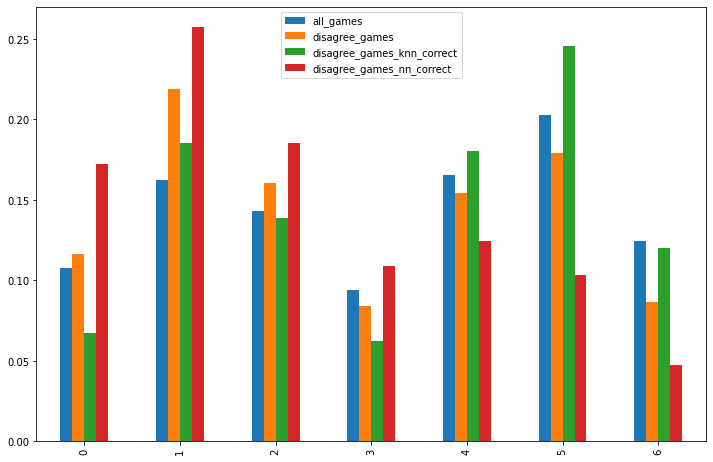

In [111]:
compare_col_signs(pct_diff_reverse_cols, positive_favors_home=False)

In [112]:
columns = ['pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

The value is 0.7188206110619904


0.7188206110619904

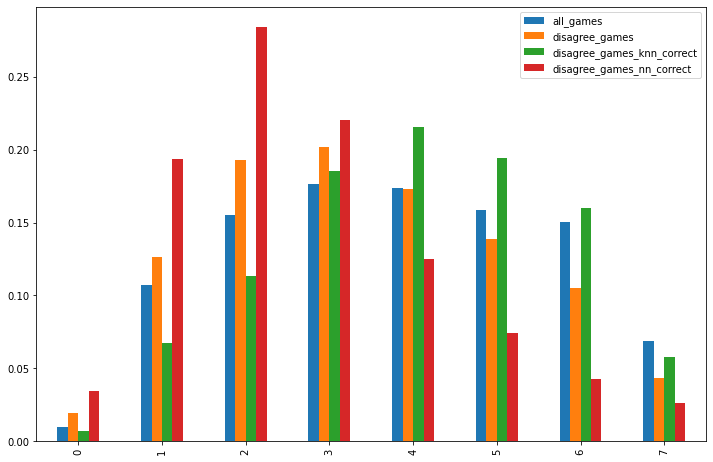

In [113]:
compare_col_signs(columns)

In [114]:
columns = ['pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

The value is 0.6929585420964732


0.6929585420964732

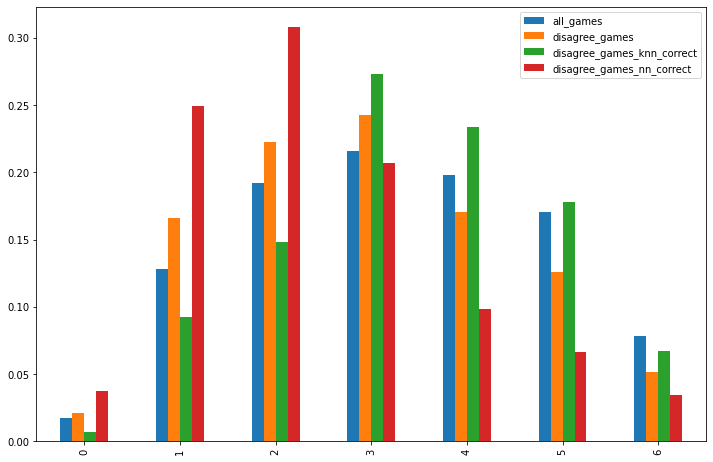

In [115]:
compare_col_signs(columns)

In [84]:
cols = ['team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_ops_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

In [83]:
def powerset(s):
    x = len(s)
    ps = []
    for i in range(1 << x):
        ps.append([s[j] for j in range(x) if (i & (1 << j))])
  
    return ps[1:]

In [118]:
best_cols = None
best_val = 0
for columns_list in powerset(cols):
    val = compare_col_signs(columns_list)
    
    if val > best_val:
        best_val = val
        best_cols = columns_list

In [119]:
best_val

0.8304106493761666

In [120]:
best_cols

['team_slg_pct_diff',
 'team_W-L_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

The value is 0.8304106493761666
1.0


0.8304106493761666

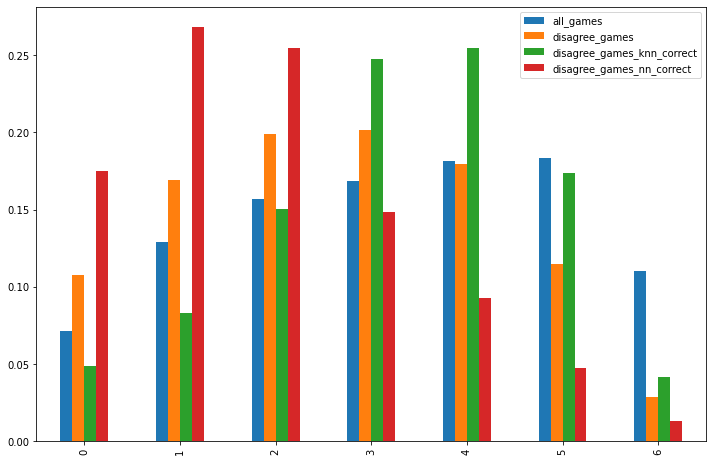

In [125]:
compare_col_signs(best_cols)